# Data Profiling

In [127]:
# Install package
!pip install yellowbrick

In [128]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [129]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

In [130]:
# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/superstore_dataset/global_superstore.csv")

In [131]:
# Data preview
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05T00:00:00Z,2013-02-07T00:00:00Z,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28T00:00:00Z,2013-01-30T00:00:00Z,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [132]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

In [133]:
# Check duplicated
df.duplicated().sum()

0

In [134]:
# Check null
df.isna().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

# Pareto

In [135]:
# Make a df with only necessary columns
df1 = df[['category', 'sub_category', 'city', 'region', 'sales', 'discount', 'profit']]
df1.head()

,category,sub_category,city,region,sales,discount,profit
0,Technology,Accessories,New York City,East,2309.650,0.0,762.1845
1,Furniture,Chairs,Wollongong,Oceania,3709.395,0.1,-288.7650
2,Technology,Phones,Brisbane,Oceania,5175.171,0.1,919.9710
3,Technology,Phones,Berlin,Central,2892.510,0.1,-96.5400
4,Technology,Copiers,Dakar,Africa,2832.960,0.0,311.5200


## Point A

In [136]:
# Make a new dataframe with only necessary columns
df1_category = df1.groupby(['category'], as_index=False).agg({
        'sales': 'sum',
        'profit': 'sum'})

df1_category

,category,sales,profit
0,Furniture,4.110874e+06,285204.72380
1,Office Supplies,3.787070e+06,518473.83430
2,Technology,4.744557e+06,663778.73318


In [138]:
# Find cumulative percentage for sales cat
df1_category_sales = df1_category.sort_values(by='sales', ascending=False).reset_index(drop = True)
df1_category_sales['cumperc_sales'] = df1_category_sales['sales'].cumsum()/df1_category_sales['sales'].sum()*100
df1_category_sales

,category,sales,profit,cumperc_sales
0,Technology,4.744557e+06,663778.73318,37.528628
1,Furniture,4.110874e+06,285204.72380,70.044931
2,Office Supplies,3.787070e+06,518473.83430,100.000000


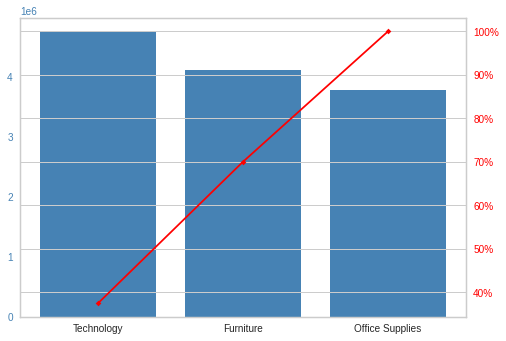

In [139]:
#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df1_category_sales['category'], df1_category_sales['sales'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_category_sales.index, df1_category_sales['cumperc_sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

From the plot above, we know that all three categories are surpass 80% Sales cutoff. Hence, Technology & Furniture alone have filled 70% of cumulative percentage, with Office Supplies filling for the rest.

Category yang memiliki 80% penjualan terbesar menurut perhitungan pareto yaitu Office Supplies. Dari 3 category item yang dijual hanya 2/3 dari item yang dijual yang memiliki bobot yang signifikan terhadap penjualan (66.6%). 66.6/70 item

In [140]:
# Find cumulative percentage for profit cat
df1_category_profit = df1_category.sort_values(by='profit', ascending=False).reset_index(drop = True)
df1_category_profit['cumperc_profit'] = df1_category_profit['profit'].cumsum()/df1_category_profit['profit'].sum()*100
df1_category_profit

,category,sales,profit,cumperc_profit
0,Technology,4.744557e+06,663778.73318,45.233257
1,Office Supplies,3.787070e+06,518473.83430,80.564700
2,Furniture,4.110874e+06,285204.72380,100.000000


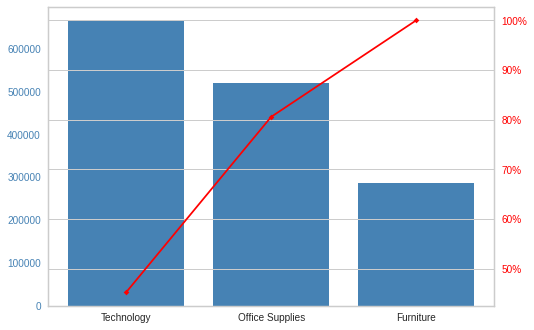

In [14]:
#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df1_category_profit['category'], df1_category_profit['profit'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_category_profit.index, df1_category_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

From the plot above, Technology and Office Supplies profit surpass 80% Profit cutoff. Meanwhile, the Furniture didn't reach cutoff of the Profit.


Category yang memiliki 80% profit terbesar menurut perhitungan pareto yaitu Office Supplies. Dari 3 category item hanya 2/3 dari item yang memiliki profit dan bobot signifikan terhadap profit (66.6%) atau  66.6/80 item.

Interpretasi : Technology memiliki nilai penjualan dan profit yang lebih tinggi dibandingkan dengan office supplies dan Furniture. Untuk meningkatkan sales/penjualan 80% kita dapat berfokus pada Kategori Technology dan Furnitur.
Untuk Peningkatan profit 80% kita dapat berfokus pada kategori barang Technologi dan Office supplies.



---



**Recommendation** :

In the term of Sales, all three categories are considered reach the sales amount of the expected. However, only Technology and Office Supplies that surpass profit cutoff. So, the company must doing a research for the Furniture to find out the reason why the Furniture reach sales cutoff but didn't make it for profit cutoff.

## Point B

In [15]:
# Make a new dataframe with only necessary columns
df1_scategory = df1.groupby(['sub_category'], as_index=False).agg({
        'sales': 'sum',
        'profit': 'sum'})

df1_scategory

,sub_category,sales,profit
0,Accessories,7.492370e+05,129626.30620
1,Appliances,1.011064e+06,141680.58940
2,Art,3.720920e+05,57953.91090
3,Binders,4.619115e+05,72449.84600
4,Bookcases,1.466572e+06,161924.41950
5,Chairs,1.501682e+06,140396.26750
6,Copiers,1.509436e+06,258567.54818
7,Envelopes,1.709043e+05,29601.11630
8,Fasteners,8.324232e+04,11525.42410
9,Furnishings,3.855783e+05,46967.42550


In [16]:
# Find cumulative percentage for sales subcat
df1_scategory_sales = df1_scategory.sort_values(by='sales', ascending=False).reset_index(drop = True)
df1_scategory_sales['cumperc_sales'] = df1_scategory_sales['sales'].cumsum()/df1_scategory_sales['sales'].sum()*100
df1_scategory_sales

,sub_category,sales,profit,cumperc_sales
0,Phones,1.706824e+06,216717.00580,13.500683
1,Copiers,1.509436e+06,258567.54818,25.440063
2,Chairs,1.501682e+06,140396.26750,37.318105
3,Bookcases,1.466572e+06,161924.41950,48.918438
4,Storage,1.127086e+06,108461.48980,57.833492
5,Appliances,1.011064e+06,141680.58940,65.830835
6,Machines,7.790601e+05,58867.87300,71.993065
7,Tables,7.570419e+05,-64083.38870,77.981136
8,Accessories,7.492370e+05,129626.30620,83.907471
9,Binders,4.619115e+05,72449.84600,87.561111


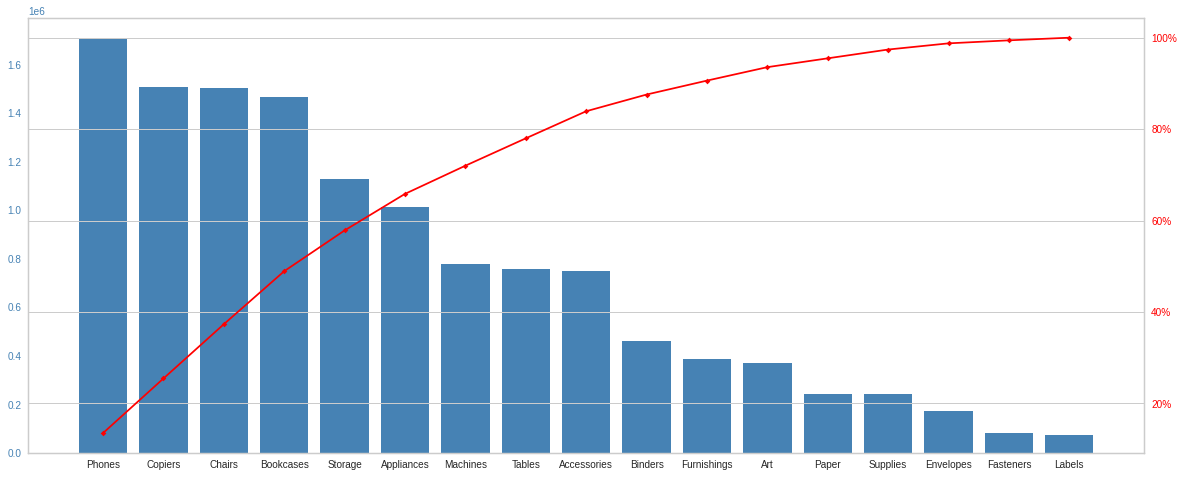

In [141]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df1_scategory_sales['sub_category'], df1_scategory_sales['sales'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_scategory_sales.index, df1_scategory_sales['cumperc_sales'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

From the Sales pareto analysis of sub-category, we found that the 4 highest sub-category that reach 80% sales cutoff are Phones, Copiers, Chairs, and Bookcases.

SubCategory yang memiliki 80% profit terbesar menurut perhitungan pareto yaitu Phones, Copiers, Chairs, Bookcases, storage. Dari 17 subcategory item hanya 5/17 dari item yang memiliki total penjualan dan bobot signifikan terhadap profit (29,4%) atau  29,4/80 item.

In [142]:
# Find cumulative percentage for profit subcat
df1_scategory_profit = df1_scategory.sort_values(by='profit', ascending=False).reset_index(drop = True)
df1_scategory_profit['cumperc_profit'] = df1_scategory_profit['profit'].cumsum()/df1_scategory_profit['profit'].sum()*100
df1_scategory_profit

,sub_category,sales,profit,cumperc_profit
0,Copiers,1.509436e+06,258567.54818,17.620107
1,Phones,1.706824e+06,216717.00580,32.388306
2,Bookcases,1.466572e+06,161924.41950,43.422659
3,Appliances,1.011064e+06,141680.58940,53.077494
4,Chairs,1.501682e+06,140396.26750,62.644810
5,Accessories,7.492370e+05,129626.30620,71.478205
6,Storage,1.127086e+06,108461.48980,78.869323
7,Binders,4.619115e+05,72449.84600,83.806424
8,Paper,2.442917e+05,59207.68270,87.841136
9,Machines,7.790601e+05,58867.87300,91.852692


In [143]:
# Drop unprofit subcategory
df1_scategory_profit = df1_scategory_profit.drop(index=16)
df1_scategory_profit

,sub_category,sales,profit,cumperc_profit
0,Copiers,1.509436e+06,258567.54818,17.620107
1,Phones,1.706824e+06,216717.00580,32.388306
2,Bookcases,1.466572e+06,161924.41950,43.422659
3,Appliances,1.011064e+06,141680.58940,53.077494
4,Chairs,1.501682e+06,140396.26750,62.644810
5,Accessories,7.492370e+05,129626.30620,71.478205
6,Storage,1.127086e+06,108461.48980,78.869323
7,Binders,4.619115e+05,72449.84600,83.806424
8,Paper,2.442917e+05,59207.68270,87.841136
9,Machines,7.790601e+05,58867.87300,91.852692


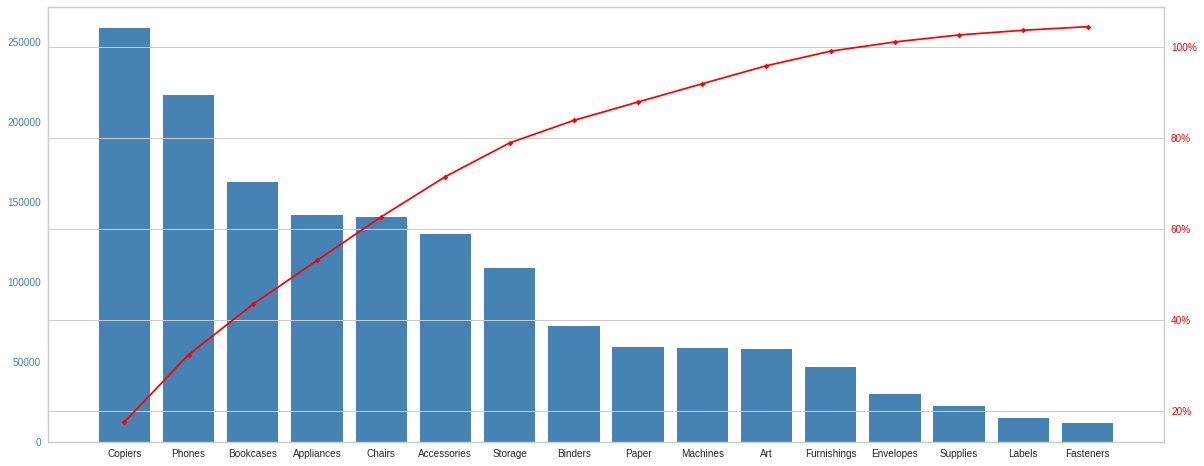

In [144]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df1_scategory_profit['sub_category'], df1_scategory_profit['profit'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_scategory_profit.index, df1_scategory_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

From the Profit pareto analysis of sub-category, we found that the 2 highest sub-category that reach 80% sales cutoff are only Copiers and Phones.



---



Dari bagan di atas sehingga dapat dianalisis bahwa yang memiliki profit tinggi adalah Copiers, phones, Bookcase, Appliance dan chairs dengan persentase masing masing 20%, 30%, 43%, 50% dan 62% persen. Namun, profit yang didapat melebihi 80 persen.

**Recommendation :**

Comparing between Sales and Profit pareto analysis, only two sub-category that reach cutoff on these two metrics: Copiers and Phones. For Chairs and Bookcases it only reach cutoff on Sales metrics, hence since these two categories reach rank 3 and 5 on Profit eventhough didn't reach the cutoff so these two still considered as okay. However the company must still find a way to raise the profit on these two so it reach the Profit cutoff.

## Point C

In [145]:
# Make a new dataframe with only necessary columns
df1_region = df1.groupby(['region'], as_index=False).agg({
        'profit': 'sum'})

df1_region

,region,profit
0,Africa,88871.63100
1,Canada,17817.39000
2,Caribbean,34571.32104
3,Central,311403.98164
4,Central Asia,132480.18700
5,EMEA,43897.97100
6,East,91522.78000
7,North,194597.95252
8,North Asia,165578.42100
9,Oceania,120089.11200


In [146]:
# Find cumulative percentage
df1_region_profit = df1_region.sort_values(by='profit', ascending=False).reset_index(drop = True)
df1_region_profit['cumperc_profit'] = df1_region_profit['profit'].cumsum()/df1_region_profit['profit'].sum()*100
df1_region_profit

,region,profit,cumperc_profit
0,Central,311403.98164,21.220650
1,North,194597.95252,34.481544
2,North Asia,165578.42100,45.764900
3,South,140355.76618,55.329455
4,Central Asia,132480.18700,64.357328
5,Oceania,120089.11200,72.540811
6,West,108418.44890,79.928995
7,East,91522.78000,86.165823
8,Africa,88871.63100,92.221988
9,EMEA,43897.97100,95.213418


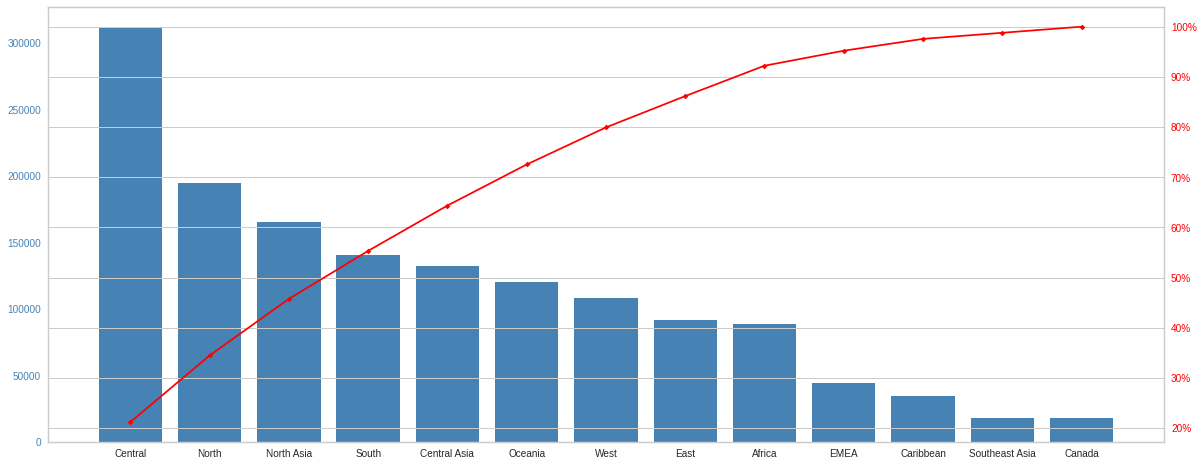

In [147]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df1_region_profit['region'], df1_region_profit['profit'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_region_profit.index, df1_region_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

**Recommendation :**

From the plot above, the only region that surpass Profit cutoff 80% pareto analysis is Central region. These need a further analysis, this could be because the company centered the business matters on Central region and just starting the expansion. If not, that company must be find a method to raise the profit from either region. The company could start from North, North Asia, and South region since there are other 3 highest regions.

Dari bagan di atas sehingga dapat dianalisis bahwa yang memiliki profit tinggi berdasarkan negara bagian adalah Central, Northm North Asia, South dengan persentase masing masing 21%, 35%, 45%, 54%. Namun, profit yang didapat melebihi 80 persen untuk central. 4/13 dari region yang memiliki dampak 20% terhadap profit dan penjualan, jika dapat meningkatkan profit dan penjualan di 4/13 region tersebut dapat meningkatkan sebanyak 80% profit dan penjualan.

## Point D

In [148]:
# Make a new dataframe with only necessary columns
df1_city = df1.groupby(['city'], as_index=False).agg({
        'profit': 'sum'})

df1_city

,city,profit
0,Aachen,1116.981
1,Aalen,283.005
2,Aalst,152.310
3,Aba,-1475.556
4,Abadan,233.820
...,...,...
3631,Zwedru,11.850
3632,Zwickau,19.380
3633,Zwolle,-55.095
3634,eMbalenhle,13.620


In [149]:
# Find cumulative percentage
df1_city_profit = df1_city.sort_values(by='profit', ascending=False).reset_index(drop = True)
df1_city_profit['cumperc_profit'] = df1_city_profit['profit'].cumsum()/df1_city_profit['profit'].sum()*100
df1_city_profit

,city,profit,cumperc_profit
0,New York City,62036.98370,4.227515
1,Los Angeles,30440.75790,6.301903
2,Seattle,29156.09670,8.288748
3,Managua,17853.71804,9.505391
4,San Francisco,17507.38540,10.698433
...,...,...,...
3631,Lahore,-13626.37200,105.092387
3632,Philadelphia,-13837.76740,104.149411
3633,Tegucigalpa,-15007.41608,103.126729
3634,Istanbul,-19960.90800,101.766492


In [150]:
# Filtering non-profit & exceed cumulativer percentage
df1_city_profit = df1_city_profit.query('profit > 0')
df1_city_profit = df1_city_profit.query('cumperc_profit < 100')
df1_city_profit

,city,profit,cumperc_profit
0,New York City,62036.98370,4.227515
1,Los Angeles,30440.75790,6.301903
2,Seattle,29156.09670,8.288748
3,Managua,17853.71804,9.505391
4,San Francisco,17507.38540,10.698433
...,...,...,...
487,Cottbus,1117.64700,99.685918
488,Aachen,1116.98100,99.762035
489,Le Petit-Quevilly,1115.30100,99.838037
490,Fort-de-France,1114.21104,99.913965


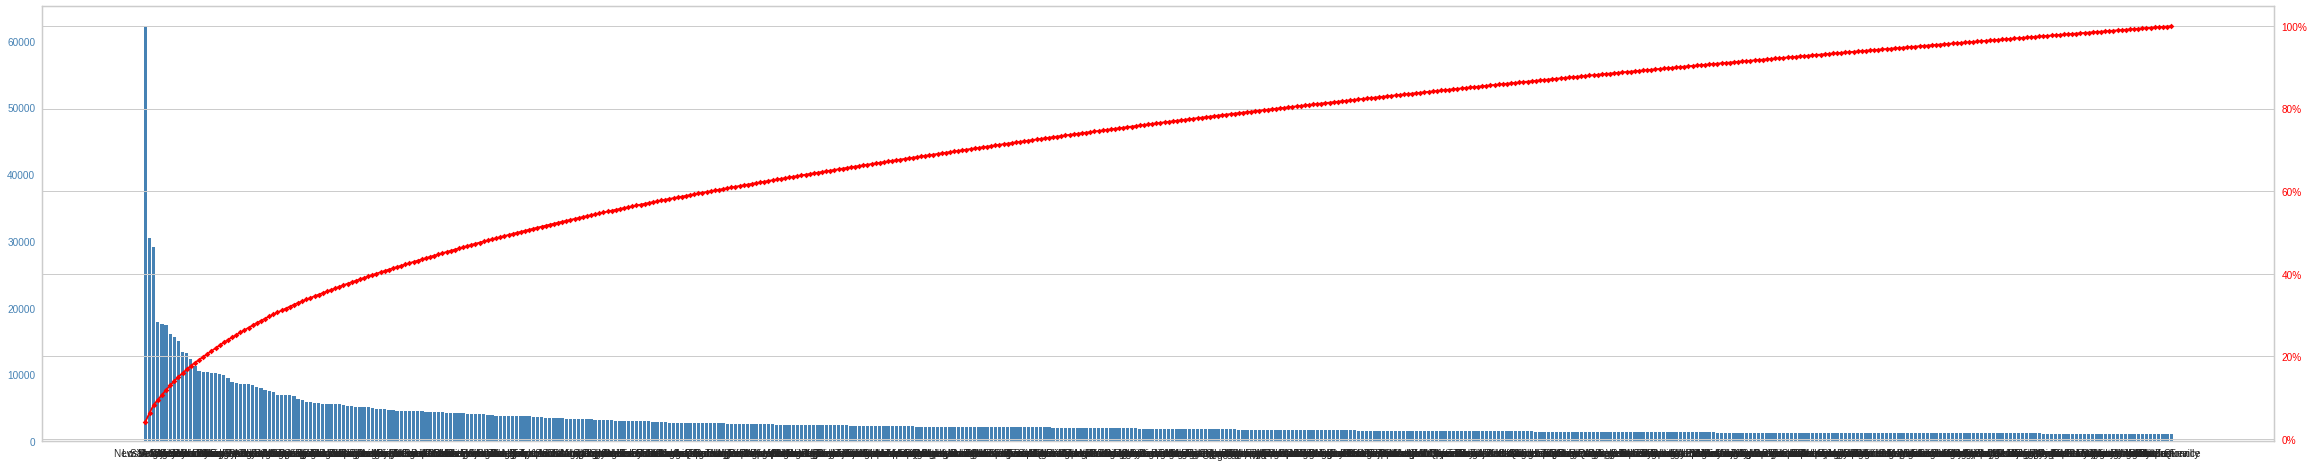

In [151]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(40,8))
ax.bar(df1_city_profit['city'], df1_city_profit['profit'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_city_profit.index, df1_city_profit['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Since the data have too much unique city, we then try to find only top 30 country.

In [152]:
df1_city_profit.head(30)

,city,profit,cumperc_profit
0,New York City,62036.98370,4.227515
1,Los Angeles,30440.75790,6.301903
2,Seattle,29156.09670,8.288748
3,Managua,17853.71804,9.505391
4,San Francisco,17507.38540,10.698433
5,London,17378.71500,11.882707
6,Sydney,16002.80700,12.973220
7,Vienna,15660.84000,14.040429
8,San Salvador,15036.51040,15.065094
9,Mexico City,13342.29176,15.974305


In [29]:
# Take only first 30 rows
df1_city_profit_top30 = df1_city_profit.query('profit > 7611.18891')
df1_city_profit_top30

,city,profit,cumperc_profit
0,New York City,62036.98370,4.227515
1,Los Angeles,30440.75790,6.301903
2,Seattle,29156.09670,8.288748
3,Managua,17853.71804,9.505391
4,San Francisco,17507.38540,10.698433
5,London,17378.71500,11.882707
6,Sydney,16002.80700,12.973220
7,Vienna,15660.84000,14.040429
8,San Salvador,15036.51040,15.065094
9,Mexico City,13342.29176,15.974305


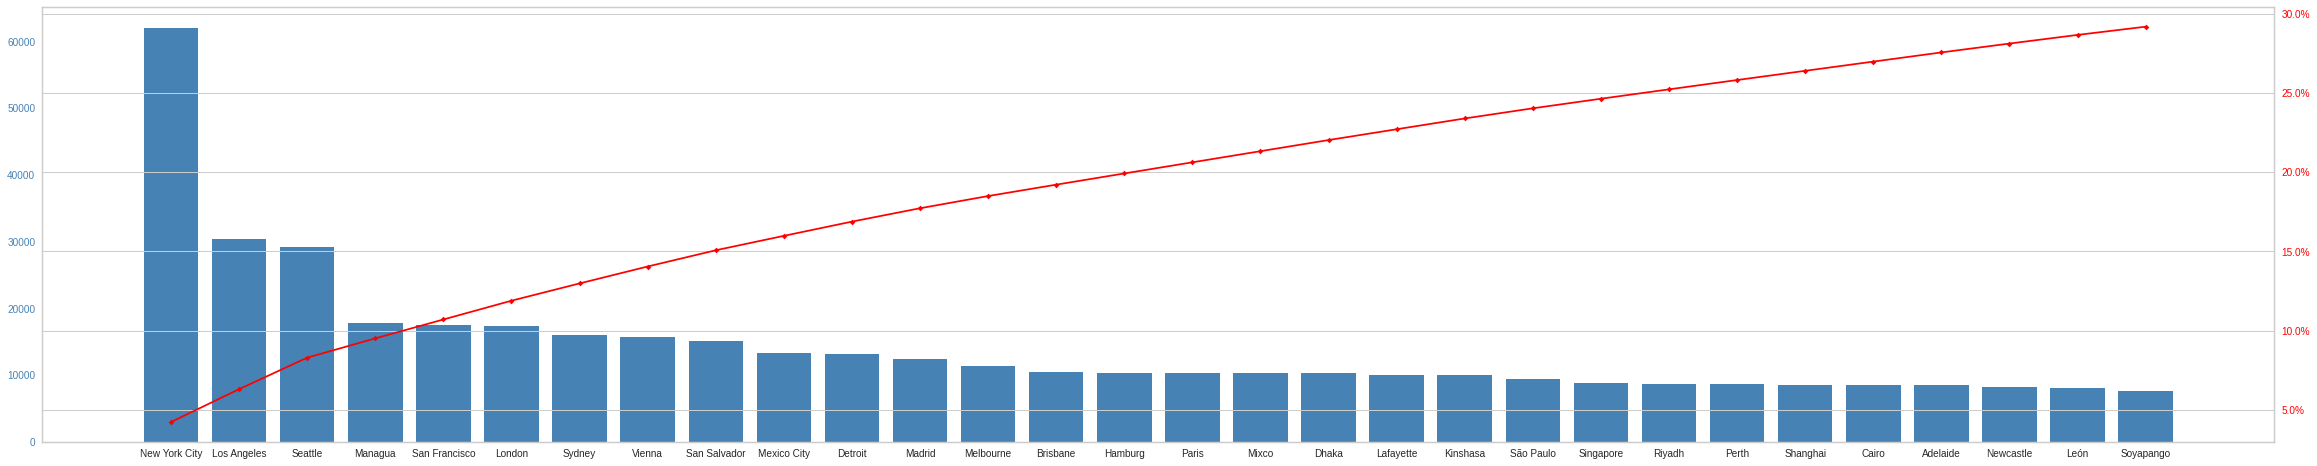

In [30]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(40,8))
ax.bar(df1_city_profit_top30['city'], df1_city_profit_top30['profit'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_city_profit_top30.index, df1_city_profit_top30['cumperc_profit'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Dari grafik di atas sehingga dapat dianalisis bahwa yang memiliki profit tinggi berdasarkan negara adalah New York, Lost Angles, Sattle dan Managua dengan persentase masing masing 4%, 6%, 8%, 9%. Namun, profit yang didapat melebihi 25 persen untuk New york city. 4/30 dari kota yang memiliki dampak 70% terhadap profit dan penjualan, jika dapat meningkatkan profit dan penjualan di 4/13 kota tersebut dapat meningkatkan sebanyak 70% profit dan penjualan.

In [31]:
# Find the value of top 30 city
df1_city_profit_top30['city'].unique()

array(['New York City', 'Los Angeles', 'Seattle', 'Managua',
       'San Francisco', 'London', 'Sydney', 'Vienna', 'San Salvador',
       'Mexico City', 'Detroit', 'Madrid', 'Melbourne', 'Brisbane',
       'Hamburg', 'Paris', 'Mixco', 'Dhaka', 'Lafayette', 'Kinshasa',
       'São Paulo', 'Singapore', 'Riyadh', 'Perth', 'Shanghai', 'Cairo',
       'Adelaide', 'Newcastle', 'León', 'Soyapango'], dtype=object)

In [32]:
# Save top 30 city to variable
top30city = ['New York City', 'Los Angeles', 'Seattle', 'Managua',
       'San Francisco', 'London', 'Sydney', 'Vienna', 'San Salvador',
       'Mexico City', 'Detroit', 'Madrid', 'Melbourne', 'Brisbane',
       'Hamburg', 'Paris', 'Mixco', 'Dhaka', 'Lafayette', 'Kinshasa',
       'São Paulo', 'Singapore', 'Riyadh', 'Perth', 'Shanghai', 'Cairo',
       'Adelaide', 'Newcastle', 'León', 'Soyapango']

In [33]:
# Find region for 4 top city
top30 = df[df['city'].isin(top30city)]
top30['region'].head(4)

0        East
2     Oceania
5     Oceania
15    Central
Name: region, dtype: object

**Recommendation :**

From the plot top 30 above, we can find 4 best city that surpass profit (based on complex plot) pareto analysis are New York City, Los Angeles, Seattle, Manague. Then, if we look at the region we get to know these city are from 3 different city: East, Oceania, Central. In which we can use these 4 city marketing strategy as baseline strategy for 3 region.

## Point E

In [153]:
# Make a new dataframe with only necessary columns for category
df1_cdisc = df1.groupby(['category'], as_index=False).agg({
        'discount': 'sum'})

df1_cdisc

,category,discount
0,Furniture,1660.030
1,Office Supplies,4297.190
2,Technology,1372.508


In [154]:
# Find cumulative percentage
df1_cdisc = df1_cdisc.sort_values(by='discount', ascending=False).reset_index(drop = True)
df1_cdisc['cumperc_disc'] = df1_cdisc['discount'].cumsum()/df1_cdisc['discount'].sum()*100
df1_cdisc

,category,discount,cumperc_disc
0,Office Supplies,4297.190,58.626869
1,Furniture,1660.030,81.274776
2,Technology,1372.508,100.000000


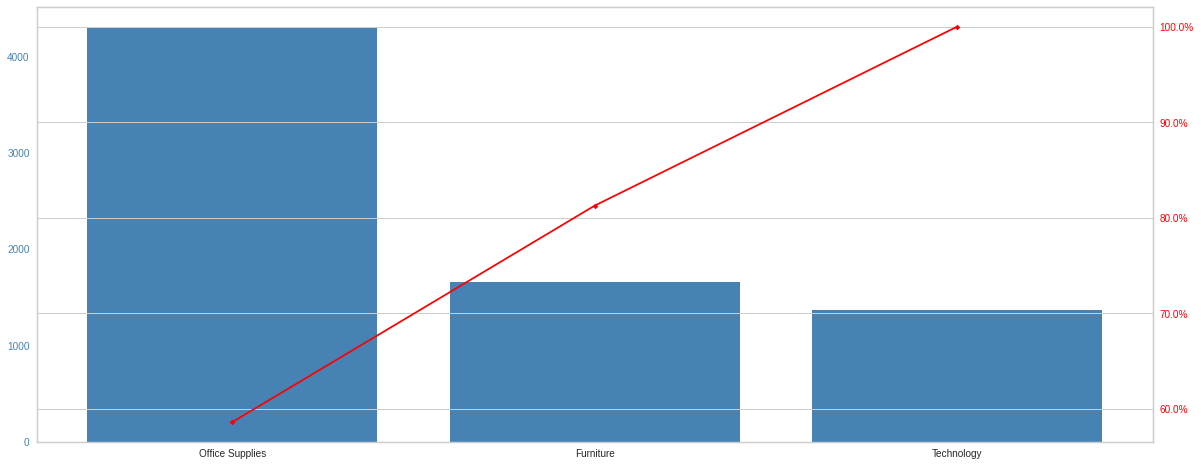

In [36]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df1_cdisc['category'], df1_cdisc['discount'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_cdisc.index, df1_cdisc['cumperc_disc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

Dari grafik diatas didapat bahwa Office supplies memiliki tingkat penjualan tertinggi terhadap discount, dimana jika 1/3 bagian kategori tersebut dapat ditingkatkan dari 33.3/55 menjadi 80% dengan berbagai treatment yang memungkinkan

From the plot, we know that the highest discount category that surpass 80% cutoff is Office Supplies.

In [37]:
# Make a new dataframe with only necessary columns for sub category
df1_sdisc = df1.groupby(['sub_category'], as_index=False).agg({
        'discount': 'sum'})

df1_sdisc

,sub_category,discount
0,Accessories,370.480
1,Appliances,248.700
2,Art,573.080
3,Binders,1102.480
4,Bookcases,370.710
5,Chairs,560.120
6,Copiers,260.418
7,Envelopes,320.810
8,Fasteners,340.240
9,Furnishings,478.880


In [38]:
# Find cumulative percentage
df1_sdisc = df1_sdisc.sort_values(by='discount', ascending=False).reset_index(drop = True)
df1_sdisc['cumperc_disc'] = df1_sdisc['discount'].cumsum()/df1_sdisc['discount'].sum()*100
df1_sdisc

,sub_category,discount,cumperc_disc
0,Binders,1102.480,15.041213
1,Storage,700.490,24.598048
2,Art,573.080,32.416619
3,Chairs,560.120,40.058376
4,Phones,489.610,46.738160
5,Furnishings,478.880,53.271554
6,Paper,387.300,58.555515
7,Bookcases,370.710,63.613138
8,Accessories,370.480,68.667623
9,Fasteners,340.240,73.309542


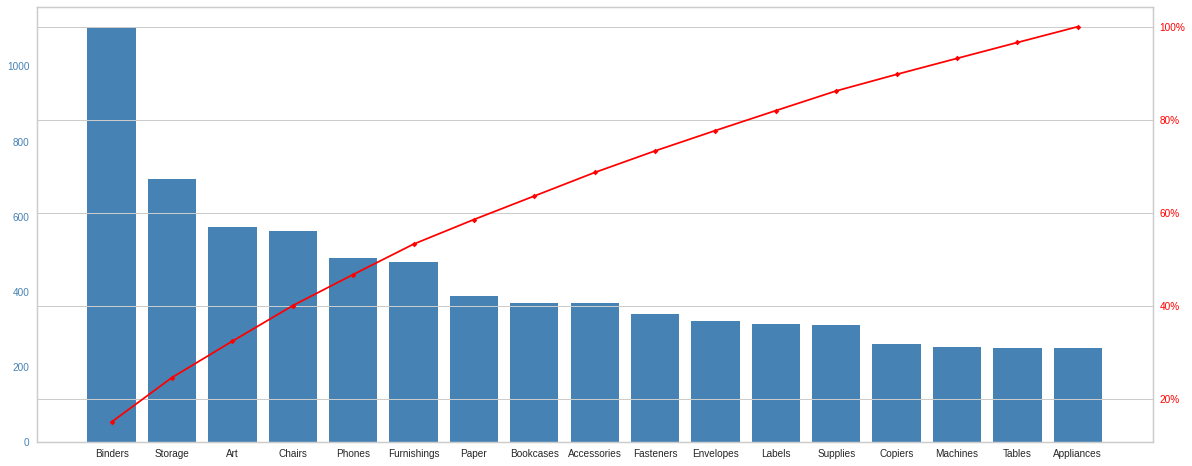

In [39]:
#create basic bar plot
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(df1_sdisc['sub_category'], df1_sdisc['discount'], color=color1)
ax.grid(False)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df1_sdisc.index, df1_sdisc['cumperc_disc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

From the plot, we know that the highest discount sub-category that surpass 80% cutoff is Binders.

Dari grafik diatas didapat bahwa Binders memiliki tingkat penjualan tertinggi terhadap discount dan yang lain nya yaitu storage, art, chairs, dan phones dimana jika 5/17 bagian kategori tersebut dapat ditingkatkan dari 29.4/50 menjadi 80% dengan berbagai treatment yang memungkinkan



---



**Recommendation :**

From the two plot above we know that they have linear relation in which sub-category Binder are from category Office Supplies. However Binders as sub-category didn't reach cutoff from Profit and Sales pareto analysis. So it need a further research, is the discount really a good strategy for this sub-category or not.

# RFM

## Preprocessing

In [40]:
# Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

In [155]:
# Make new df using necessary columns
df2= df[['order_id', 'customer_id', 'order_date', 'sales', 'quantity']]
df2

,order_id,customer_id,order_date,sales,quantity
0,CA-2012-124891,RH-19495,2012-07-31T00:00:00Z,2309.650,7
1,IN-2013-77878,JR-16210,2013-02-05T00:00:00Z,3709.395,9
2,IN-2013-71249,CR-12730,2013-10-17T00:00:00Z,5175.171,9
3,ES-2013-1579342,KM-16375,2013-01-28T00:00:00Z,2892.510,5
4,SG-2013-4320,RH-9495,2013-11-05T00:00:00Z,2832.960,8
...,...,...,...,...,...
51285,IN-2014-62366,KE-16420,2014-06-19T00:00:00Z,65.100,5
51286,US-2014-102288,ZC-21910,2014-06-20T00:00:00Z,0.444,1
51287,US-2013-155768,LB-16795,2013-12-02T00:00:00Z,22.920,3
51288,MX-2012-140767,RB-19795,2012-02-18T00:00:00Z,13.440,2


In [156]:
# Make GMV columns using Sales & Quantity
df2['GMV'] = df2['sales'] * df2['quantity']
df2

,order_id,customer_id,order_date,sales,quantity,GMV
0,CA-2012-124891,RH-19495,2012-07-31T00:00:00Z,2309.650,7,16167.550
1,IN-2013-77878,JR-16210,2013-02-05T00:00:00Z,3709.395,9,33384.555
2,IN-2013-71249,CR-12730,2013-10-17T00:00:00Z,5175.171,9,46576.539
3,ES-2013-1579342,KM-16375,2013-01-28T00:00:00Z,2892.510,5,14462.550
4,SG-2013-4320,RH-9495,2013-11-05T00:00:00Z,2832.960,8,22663.680
...,...,...,...,...,...,...
51285,IN-2014-62366,KE-16420,2014-06-19T00:00:00Z,65.100,5,325.500
51286,US-2014-102288,ZC-21910,2014-06-20T00:00:00Z,0.444,1,0.444
51287,US-2013-155768,LB-16795,2013-12-02T00:00:00Z,22.920,3,68.760
51288,MX-2012-140767,RB-19795,2012-02-18T00:00:00Z,13.440,2,26.880


In [157]:
# Change order date to datetime
df2['order_date'] = pd.to_datetime(df2['order_date'])
df2

,order_id,customer_id,order_date,sales,quantity,GMV
0,CA-2012-124891,RH-19495,2012-07-31 00:00:00+00:00,2309.650,7,16167.550
1,IN-2013-77878,JR-16210,2013-02-05 00:00:00+00:00,3709.395,9,33384.555
2,IN-2013-71249,CR-12730,2013-10-17 00:00:00+00:00,5175.171,9,46576.539
3,ES-2013-1579342,KM-16375,2013-01-28 00:00:00+00:00,2892.510,5,14462.550
4,SG-2013-4320,RH-9495,2013-11-05 00:00:00+00:00,2832.960,8,22663.680
...,...,...,...,...,...,...
51285,IN-2014-62366,KE-16420,2014-06-19 00:00:00+00:00,65.100,5,325.500
51286,US-2014-102288,ZC-21910,2014-06-20 00:00:00+00:00,0.444,1,0.444
51287,US-2013-155768,LB-16795,2013-12-02 00:00:00+00:00,22.920,3,68.760
51288,MX-2012-140767,RB-19795,2012-02-18 00:00:00+00:00,13.440,2,26.880


In [158]:
# Checking latest date of the date
df2['order_date'].max()

Timestamp('2014-12-31 00:00:00+0000', tz='UTC')

In [159]:
# Save the date for analysis
analysis_date = df2['order_date'].max()

In [160]:
# Grouping the dataframe into proper columns
data_rfm = df2.groupby(['customer_id'], as_index=False).agg({
        'order_date': lambda x: (analysis_date - x.max()).days,
        'order_id': 'count',
        'GMV': 'sum'})

In [161]:
# Renaming the column to ease analysis
data_rfm.rename(columns={'customer_id': 'Customer',
                         'order_date': 'Recency',
                         'order_id': 'Frequency',
                         'GMV': 'Monetary'}, inplace=True)

Since GMV data may contain negative value (this is because sometimes the price may be negative as impact of loss sales), we decide to delete it from segmentation because loss sales didn't give good insight for the segmentation.

In [162]:
# Drop GMV that contains - value
data_rfm = data_rfm[data_rfm['Monetary'] > 0]

In [163]:
# Checking the final rfm date
data_rfm

,Customer,Recency,Frequency,Monetary
0,AA-10315,8,42,56735.25400
1,AA-10375,6,42,23893.63700
2,AA-10480,125,38,89517.09654
3,AA-10645,28,73,72217.61334
4,AA-315,2,8,7865.97600
...,...,...,...,...
1585,YS-21880,9,54,96423.61400
1586,ZC-11910,200,1,7.17300
1587,ZC-21910,3,84,155687.54878
1588,ZD-11925,3,18,11160.13200


## Analysis

In [164]:
# Define labels for rfm and separate the data into 4 quantile
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_rfm['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_rfm['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_rfm['Monetary'], q=4, labels = m_labels)

In [165]:
# Assign the labels to R, F, M columns
data_rfm = data_rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [166]:
# Define score based on the label
data_rfm['rfm_score'] = data_rfm[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [168]:
# Change rfm score data type into integer for further analysis
data_rfm['rfm_score'] = data_rfm['rfm_score'].astype('int')

In [169]:
# Checking final data
data_rfm.head(10)

,Customer,Recency,Frequency,Monetary,R,F,M,rfm_score
0,AA-10315,8,42,56735.25400,4,3,3,433
1,AA-10375,6,42,23893.63700,4,3,2,432
2,AA-10480,125,38,89517.09654,1,3,4,134
3,AA-10645,28,73,72217.61334,3,4,4,344
4,AA-315,2,8,7865.97600,4,1,2,412
5,AA-375,253,13,1566.30000,1,2,1,121
6,AA-480,314,10,5794.62300,1,1,2,112
7,AA-645,51,18,4264.86000,2,2,1,221
8,AB-10015,16,77,94513.69970,3,4,4,344
9,AB-10060,42,57,102219.22340,2,4,4,244


## Post-Segmentation Analysis

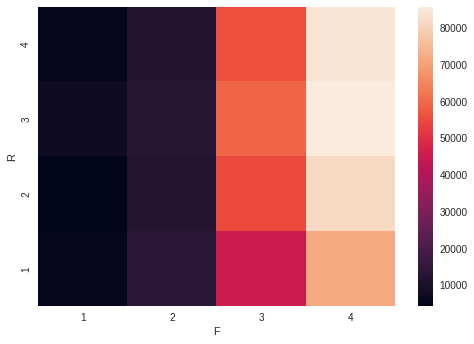

In [170]:
# Heatmap visualization
sns.heatmap(
    pd.pivot_table(data_rfm[["R", "F","Monetary"]], values = "Monetary", index = ["R"], columns = ["F"])
);

heat map menggambarkan jumlah spending untuk customer, makin terang makin besar spendingnya, R makin tinggi rank makin bagus, F makin turun juga R akan semakin turun nilai nya

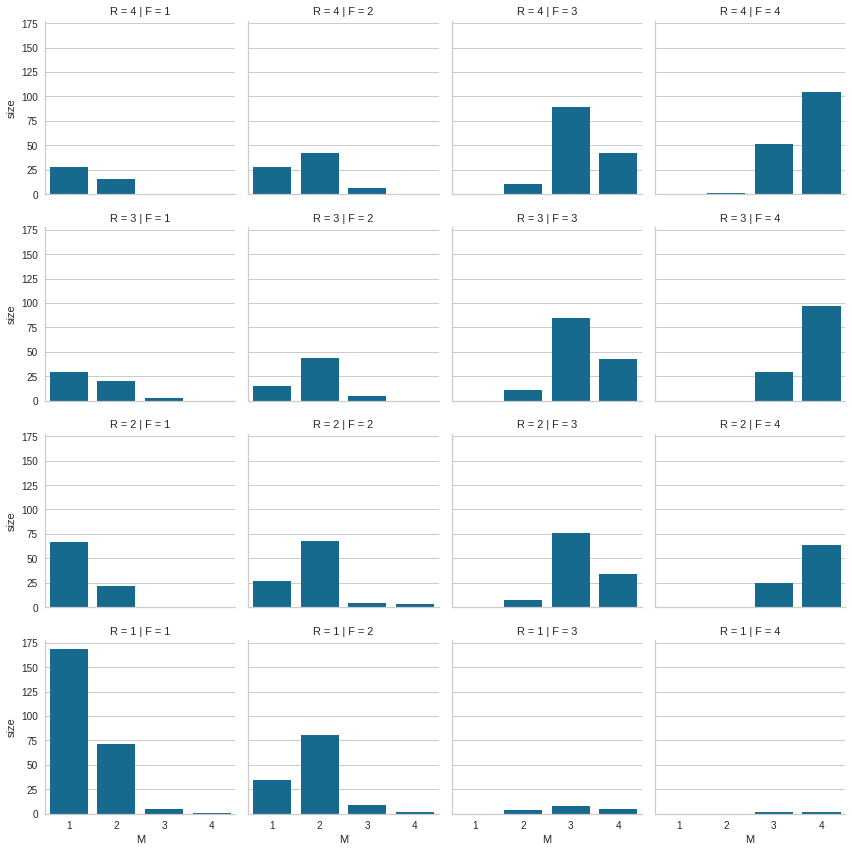

In [171]:
# RFM Distribution

rfm_bar_data = data_rfm[["R", "F", "M"]].groupby(["R","F","M"], as_index = False).size()

g = sns.FacetGrid(
    data = rfm_bar_data,
    col = "F",
    row = "R"
)
g.map(sns.barplot, "M", "size");

Dari hasil grafik diatas sangat sedikit sekali R 4, F4 dan M 4,
dan R 1, F 1, dan M 1 merupakan customer yang spending besar dan jarang transaksi dan jarang visit.

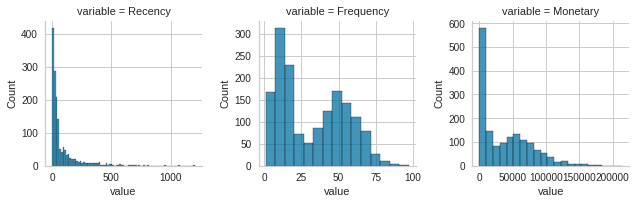

In [172]:
# Recency, Frequency, Monetary distribution

g = sns.FacetGrid(
    data = pd.melt(
     data_rfm[["Recency", "Frequency","Monetary"]],
     value_vars=["Recency","Frequency", "Monetary"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

Distribusi Recency menggambarkan skew ke kanan menandakan banyak nya customer yang baru untuk bertransaksi, Distribusi Frequency skew di tengah dan ke kanan menandakan seberapa sering customer berbelanja dan seberapa banyak yang dibeli, Distribusi Monetary skew ke kanan menandakan besaran customer untuk spending uang belanja nya semakin tinggi semakin sedikit, begitupun sebaliknya

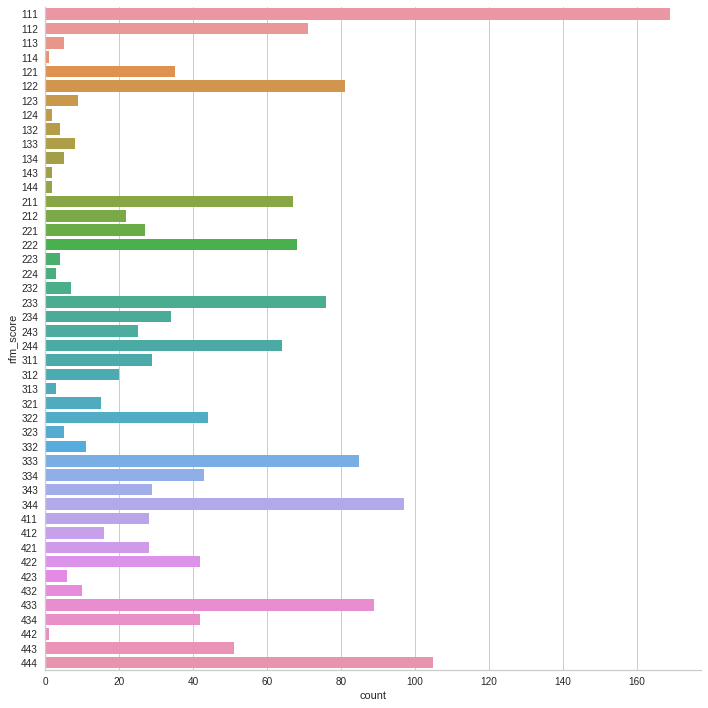

In [173]:
# RFM score to RFM segment

sns.catplot(
    y = "rfm_score", 
    data = data_rfm.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

For the segmentation we tried to divide the customer to five segmentations :
1. Champion : customer with highest rfm score 444 point.
2. Promising : customer two 4 point rfm score, these customer have highest possibility to turn into champion customer which is valuable asset for company.
3. Average : customer considered as normal customer with average score, which is have at least double 3 score or combined 3 & 4 score each 1.
4. At Risk : customer with double 1, 2, or both point rfm score, for this customer the company must handle this seriously so didn't turn to lost customers.
5. Lost : these customer with the lowest rfm score, so the company must take out these customers from any marketing and promotion consideration.

In [174]:
data_rfm['rfm_segment'] = np.select(
    [
     data_rfm['rfm_score'].isin([444]),
     data_rfm['rfm_score'].isin([344, 434, 443, 414, 424, 441, 442]),
     data_rfm['rfm_score'].isin([313, 314, 333, 334, 343, 433, 323, 324, 331, 332, 341, 342, 413, 423, 431, 432, 133, 134, 143, 144, 233, 234, 243, 244]),
     data_rfm['rfm_score'].isin([112, 113, 114, 121, 131, 141, 211, 311, 411, 221, 222, 223, 224, 232, 231, 241, 242, 312, 321, 322, 412, 422, 421, 122, 123, 124, 132, 142, 212, 213, 214]),
     data_rfm['rfm_score'].isin([111])
    ],
    [
     'Champion Customers',
     'Promising Customers',
     'Average Customers',
     "At Risk Customers",
     "Lost Customers"
    ]
)

data_rfm.head(10)

,Customer,Recency,Frequency,Monetary,R,F,M,rfm_score,rfm_segment
0,AA-10315,8,42,56735.25400,4,3,3,433,Average Customers
1,AA-10375,6,42,23893.63700,4,3,2,432,Average Customers
2,AA-10480,125,38,89517.09654,1,3,4,134,Average Customers
3,AA-10645,28,73,72217.61334,3,4,4,344,Promising Customers
4,AA-315,2,8,7865.97600,4,1,2,412,At Risk Customers
5,AA-375,253,13,1566.30000,1,2,1,121,At Risk Customers
6,AA-480,314,10,5794.62300,1,1,2,112,At Risk Customers
7,AA-645,51,18,4264.86000,2,2,1,221,At Risk Customers
8,AB-10015,16,77,94513.69970,3,4,4,344,Promising Customers
9,AB-10060,42,57,102219.22340,2,4,4,244,Average Customers


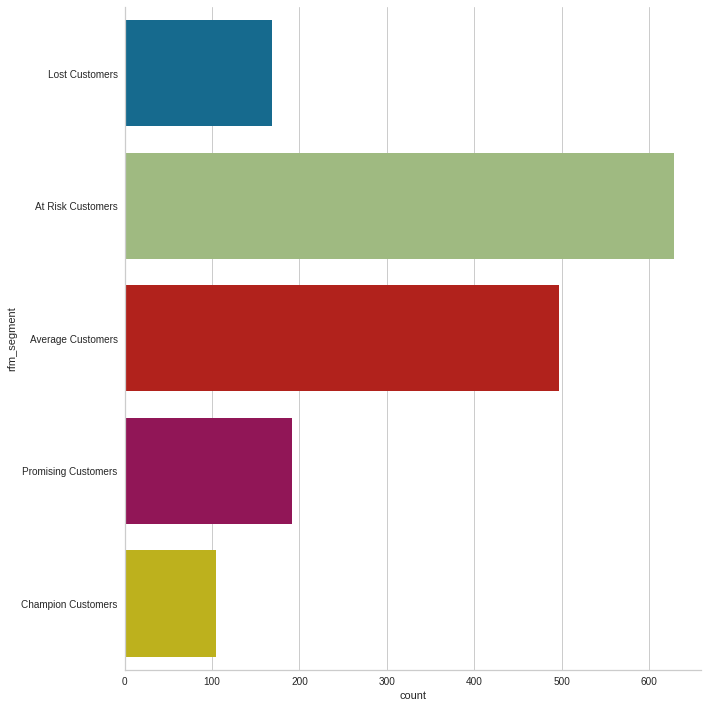

In [175]:
# RFM segmentation distribution

sns.catplot(
    y = "rfm_segment", 
    data = data_rfm.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);

## Recommendation

From the analysis above, we found that the lowest segmentation (111 rfm score) have the highest count value. It's not good for the company since the customer with low value are the highest percentage amongs all, the company must find the cause as soon as possible. However, the highest segmentation (444 rfm score) have ranked two based on values. The company can raise up these champion customer so can overcome the lowest segmentation.

If we take a look at segmentation, "At Risk" customers have highest count. The company must save this customer and turn them into average customer at least before lost them.

# PCA + K-Means RFM + Class Segmentation

## Preprocessing

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

In [177]:
# Make new dataframe with only necessary columns
df3 = df[['order_id', 'customer_id', 'order_date', 'sales', 'quantity', 'discount']]

In [178]:
# Change datetype to datetime and save latest date
df3['order_date'] = pd.to_datetime(df3['order_date'])
latest_date = df3['order_date'].max()

In [179]:
# Make GMV column
df3['GMV'] = df3['sales'] * df3['quantity']

In [180]:
# Grouping the dataframe into proper columns
data_model = df3.groupby(['customer_id'], as_index=False).agg({
        'order_date': lambda x: (latest_date - x.max()).days,
        'order_id': 'count',
        'GMV': 'sum',
        'discount': 'sum'})

# Renaming the column to ease analysis
data_model.rename(columns={'customer_id': 'Customer',
                         'order_date': 'Recency',
                         'order_id': 'Frequency',
                         'GMV': 'Monetary',
                         'discount': 'Class'}, inplace=True)

In [181]:
data_model.head()

,Customer,Recency,Frequency,Monetary,Class
0,AA-10315,8,42,56735.25400,4.350
1,AA-10375,6,42,23893.63700,7.000
2,AA-10480,125,38,89517.09654,2.982
3,AA-10645,28,73,72217.61334,9.194
4,AA-315,2,8,7865.97600,1.800


As we can see, the data didn't standarize yet especially monetary with high value. We need to standardize this using standard scaler.

In [182]:
# Standardize RFM value
scaler_obj = StandardScaler()
scaled_data = scaler_obj.fit_transform(data_model[["Recency", "Frequency", "Monetary", "Class"]].to_numpy())
data_for_kmeans = pd.DataFrame(scaled_data, columns = ["Recency", "Frequency", "Monetary", "Class"])
data_for_kmeans

,Recency,Frequency,Monetary,Class
0,-0.598504,0.444773,0.469804,-0.074732
1,-0.614165,0.444773,-0.394381,0.687277
2,0.317661,0.262155,1.332415,-0.468101
3,-0.441895,1.860064,0.877202,1.318163
4,-0.645487,-1.107482,-0.816128,-0.807986
...,...,...,...,...
1585,-0.590673,0.992627,1.514151,-0.232885
1586,0.904946,-1.427063,-1.022922,-1.124292
1587,-0.637656,2.362264,3.073605,3.882539
1588,-0.637656,-0.650936,-0.729447,-0.951761


In [183]:
pca_model = PCA()
pca_model.fit(data_for_kmeans)
pca_result = pca_model.transform(data_for_kmeans)

In [184]:
pca_model.explained_variance_ratio_

array([0.70674175, 0.18470808, 0.083859  , 0.02469118])

In [185]:
pca_result

array([[ 0.67661302, -0.40098587,  0.38898356, -0.11147649],
       [ 0.61776507, -0.42460818, -0.74851394, -0.28409254],
       [ 0.50138329,  0.52037897,  1.25228241,  0.27146214],
       ...,
       [ 5.21252637,  1.38644179, -0.71711382,  0.94928866],
       [-1.0236189 , -1.08620412,  0.16722043, -0.11255139],
       [ 0.28283929, -0.59878691, -0.19343307, -0.15327431]])

In [186]:
pca_result = pd.DataFrame(pca_result, columns = ["PC1", "PC2", "PC3", "PC4"])
pca_result['cluster'] = kmeans_model.labels_

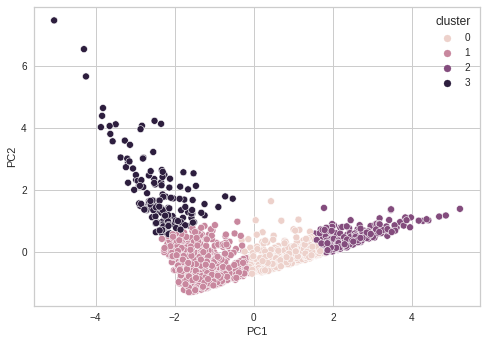

In [187]:
sns.scatterplot(data = pca_result, x = "PC1", y = "PC2", hue = "cluster");

In [188]:
centroids = kmeans_model.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
colors = ['#DF2020', '#81DF20', '#2095DF', '#00FFFF']
pca_result['c'] = pca_result.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

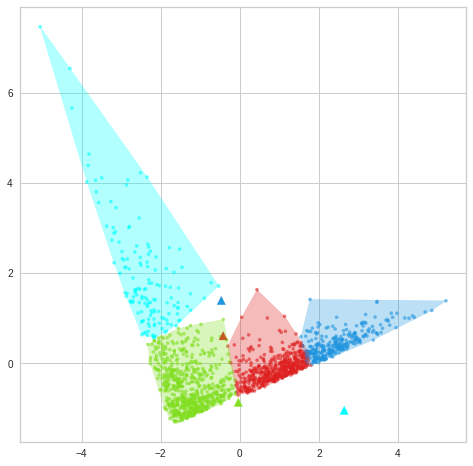

In [189]:
fig, ax = plt.subplots(1, figsize=(8,8))

plt.scatter(pca_result.PC1, pca_result.PC2, c=pca_result.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

# draw enclosure
for i in pca_result.cluster.unique():
    points = pca_result[pca_result.cluster == i][['PC1', 'PC2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

In [194]:
def myplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()


In [218]:
pca_result

,PC1,PC2,PC3,PC4,cluster,c
0,0.676613,-0.400986,0.388984,-0.111476,0,#DF2020
1,0.617765,-0.424608,-0.748514,-0.284093,0,#DF2020
2,0.501383,0.520379,1.252282,0.271462,0,#DF2020
3,2.363468,0.393109,-0.263037,-0.593667,2,#2095DF
4,-1.252167,-1.151372,-0.038248,0.258907,1,#81DF20
...,...,...,...,...,...,...
1585,1.458180,-0.113420,1.238582,-0.088632,0,#DF2020
1586,-2.258790,0.121850,0.071046,0.209316,1,#81DF20
1587,5.212526,1.386442,-0.717114,0.949289,2,#2095DF
1588,-1.023619,-1.086204,0.167220,-0.112551,1,#81DF20


## Modelling

For this chance, we use initial cluster 4. This is based on basic quantile separate.

In [197]:
# Fit model to the data
kmeans_model = KMeans(
    n_clusters = 4,
    random_state=1000
)

kmeans_model.fit(data_for_kmeans)

KMeans(n_clusters=4, random_state=1000)

In [198]:
# Checking created clusters
np.unique(kmeans_model.labels_, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([507, 650, 290, 143]))

In [199]:
# Assign cluster label to "cluster" column.
data_model["cluster"] = kmeans_model.labels_

## Post-model Analysis

In [200]:
# Check data after clustering with k-means
data_model

,Customer,Recency,Frequency,Monetary,Class,cluster
0,AA-10315,8,42,56735.25400,4.350,0
1,AA-10375,6,42,23893.63700,7.000,0
2,AA-10480,125,38,89517.09654,2.982,0
3,AA-10645,28,73,72217.61334,9.194,2
4,AA-315,2,8,7865.97600,1.800,1
...,...,...,...,...,...,...
1585,YS-21880,9,54,96423.61400,3.800,0
1586,ZC-11910,200,1,7.17300,0.700,1
1587,ZC-21910,3,84,155687.54878,18.112,2
1588,ZD-11925,3,18,11160.13200,1.300,1


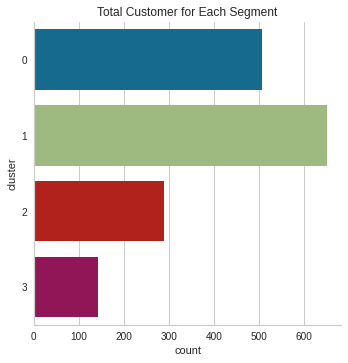

In [201]:
# Total users per segments
sns.catplot(
    y = "cluster", 
    data = data_model, 
    kind = "count", 
    height = 5
).ax.set_title("Total Customer for Each Segment");

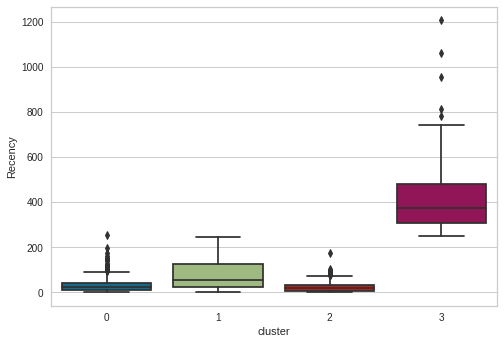

In [202]:
# Recency Days Distribution of Each Segments
sns.boxplot(x = 'cluster', y = 'Recency', data = data_model);

Dari Grafik boxplot didapat bahwa recency dari cluster 2, 0 dan 1 memiliki nilai recency yang cukup rendah dan cluster 3 memiliki recency diatas 200 hingga 500,

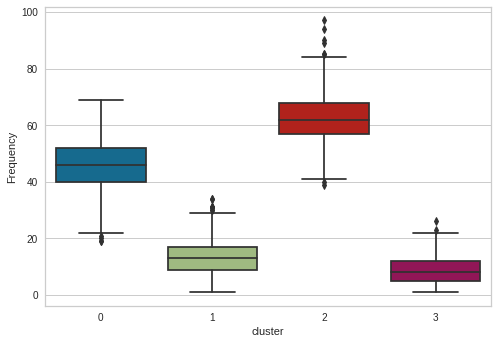

In [203]:
# Transaction Frequency Distribution of Each Segment
sns.boxplot(x = 'cluster', y = 'Frequency', data = data_model);

Dari sisi Frequency cluster 2 memiliki niali yang unggul dari cluster lain,

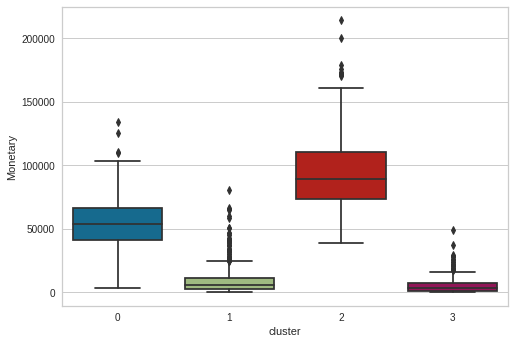

In [204]:
# GMV Distribution of Each Segment
sns.boxplot(x = 'cluster', y = 'Monetary', data = data_model);

  Dari sisi GMV cluster 2 memiliki niali yang unggul dari cluster lain

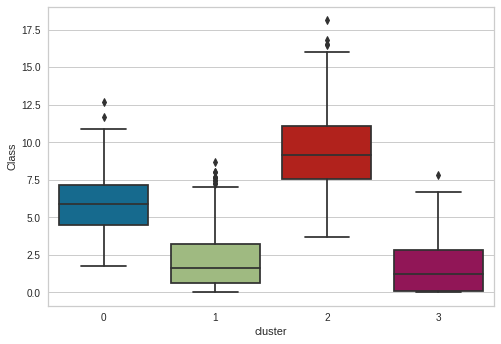

In [206]:
# Class Distribution of Each Segment
sns.boxplot(x = 'cluster', y = 'Class', data = data_model);

Dapat Disimpulkan : cluster 2 merupakan cluster terbaik karena dari sisi GMV dan Frequency sangat unggul pertama sedangkan di unggul ke dua di cluster 0 dan kemudian cluster 1 dan kemudian cluster 3

## Cluster Evaluations

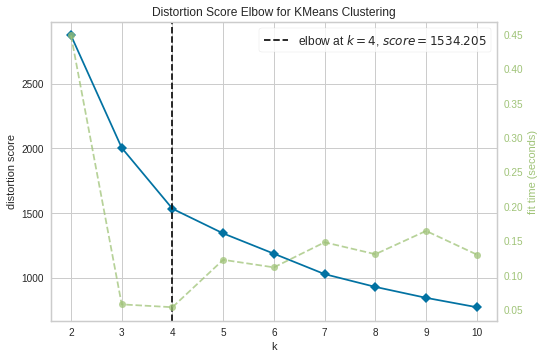

In [207]:
# Elbow method
model = KElbowVisualizer(KMeans(random_state=1000), k=10)
model.fit(data_for_kmeans)
model.show()

From elbow method, we get that the best k value for cluster is 4.

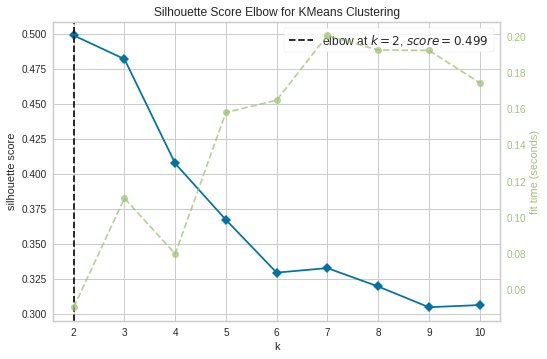

In [208]:
# Silhouette method
model = KElbowVisualizer(KMeans(random_state=1000), k=10, metric = "silhouette")
model.fit(data_for_kmeans)
model.show()

From elbow method, we get that the best k value for cluster is 2.

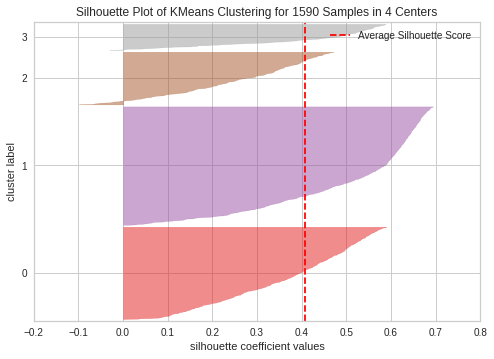

In [209]:
# Silhouette Visualization
visualizer = SilhouetteVisualizer(kmeans_model, is_fitted = True)
visualizer.fit(data_for_kmeans)
visualizer.show();

From all analysis we get that the best k is either 2 or 4. But since we need strategy as much as possible, we need to get as much cluster as possible on the optimize range. So we decide to go for 4 clusters.

## Cluster Visualization

In [210]:
data_for_kmeans

,Recency,Frequency,Monetary,Class
0,-0.598504,0.444773,0.469804,-0.074732
1,-0.614165,0.444773,-0.394381,0.687277
2,0.317661,0.262155,1.332415,-0.468101
3,-0.441895,1.860064,0.877202,1.318163
4,-0.645487,-1.107482,-0.816128,-0.807986
...,...,...,...,...
1585,-0.590673,0.992627,1.514151,-0.232885
1586,0.904946,-1.427063,-1.022922,-1.124292
1587,-0.637656,2.362264,3.073605,3.882539
1588,-0.637656,-0.650936,-0.729447,-0.951761


In [211]:
# Make dataframe for visualization
data_model_viz = data_for_kmeans[['Recency','Frequency','Monetary', 'Class']]
data_model_viz

,Recency,Frequency,Monetary,Class
0,-0.598504,0.444773,0.469804,-0.074732
1,-0.614165,0.444773,-0.394381,0.687277
2,0.317661,0.262155,1.332415,-0.468101
3,-0.441895,1.860064,0.877202,1.318163
4,-0.645487,-1.107482,-0.816128,-0.807986
...,...,...,...,...
1585,-0.590673,0.992627,1.514151,-0.232885
1586,0.904946,-1.427063,-1.022922,-1.124292
1587,-0.637656,2.362264,3.073605,3.882539
1588,-0.637656,-0.650936,-0.729447,-0.951761


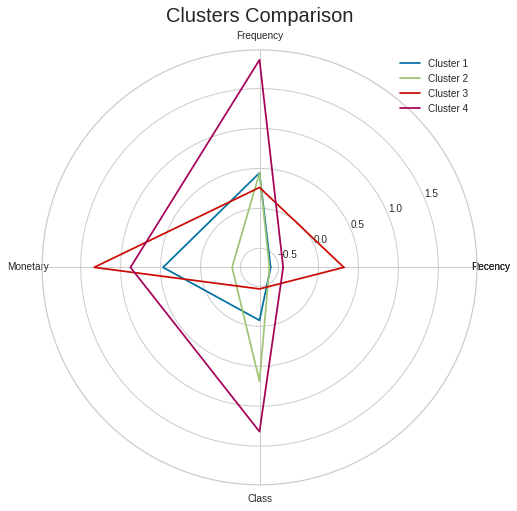

In [212]:
# Visualize using radar plot
categories = list(data_model_viz)
categories = [*categories, categories[0]]

Clusters_1 = data_model_viz.loc[0].values.tolist()
Clusters_2 = data_model_viz.loc[1].values.tolist()
Clusters_3 = data_model_viz.loc[2].values.tolist()
Clusters_4 = data_model_viz.loc[3].values.tolist()
Clusters_1 = [*Clusters_1, Clusters_1[0]]
Clusters_2 = [*Clusters_2, Clusters_2[0]]
Clusters_3 = [*Clusters_3, Clusters_3[0]]
Clusters_4 = [*Clusters_4, Clusters_4[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_1, label='Cluster 1')
plt.plot(label_loc, Clusters_2, label='Cluster 2')
plt.plot(label_loc, Clusters_3, label='Cluster 3')
plt.plot(label_loc, Clusters_4, label='Cluster 4')
plt.title('Clusters Comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

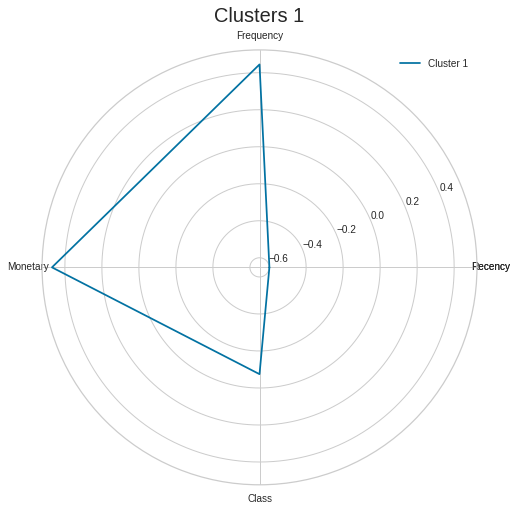

In [213]:
# Visualize using radar plot
categories = list(data_model_viz)
categories = [*categories, categories[0]]

Clusters_1 = data_model_viz.loc[0].values.tolist()
Clusters_1 = [*Clusters_1, Clusters_1[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_1, label='Cluster 1')
plt.title('Clusters 1', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

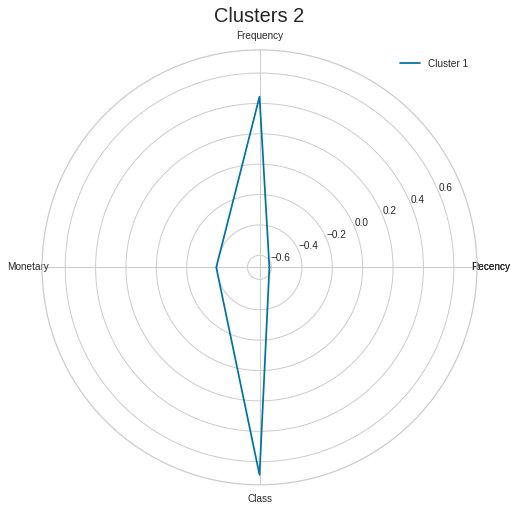

In [214]:
# Visualize using radar plot
categories = list(data_model_viz)
categories = [*categories, categories[0]]

Clusters_2 = data_model_viz.loc[1].values.tolist()
Clusters_2 = [*Clusters_2, Clusters_2[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_2, label='Cluster 1')
plt.title('Clusters 2', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

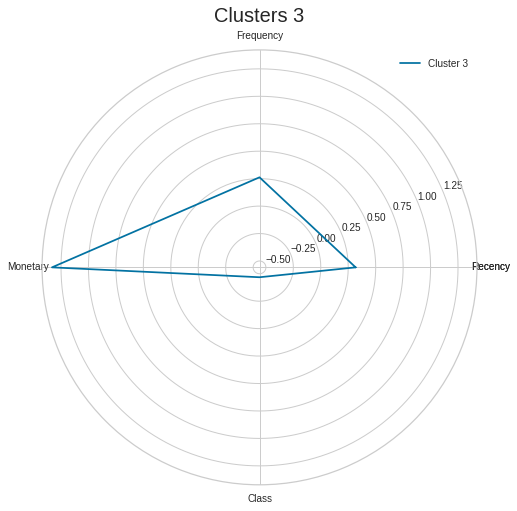

In [215]:
# Visualize using radar plot
categories = list(data_model_viz)
categories = [*categories, categories[0]]

Clusters_3 = data_model_viz.loc[2].values.tolist()
Clusters_3 = [*Clusters_3, Clusters_3[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_3, label='Cluster 3')
plt.title('Clusters 3', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

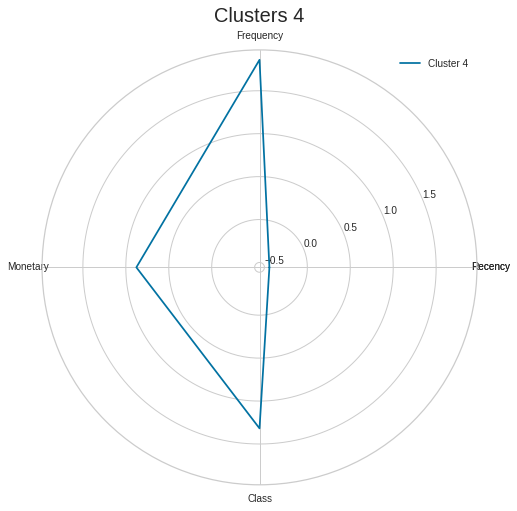

In [216]:
# Visualize using radar plot
categories = list(data_model_viz)
categories = [*categories, categories[0]]

Clusters_4 = data_model_viz.loc[3].values.tolist()
Clusters_4 = [*Clusters_4, Clusters_4[0]]


label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Clusters_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Clusters_4, label='Cluster 4')
plt.title('Clusters 4', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()